Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pickle
# import sys
# import pandas as pd 
# import open3d as o3d
# from nuscenes.nuscenes import NuScenes
# import os
# from nuscenes.utils.data_classes import LidarPointCloud,Box
# mini = False
# if mini:
#         dataroot = '/media/ssd_reza/nuscenes/v1.0-mini'
#         version = 'v1.0-mini'
# else:
#     dataroot = '/media/ssd_reza/nuscenes'
#     version = 'v1.0-trainval'
# nusc = NuScenes(version=version, dataroot=dataroot, verbose=True)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 76.472 seconds.
Reverse indexing ...
Done reverse indexing in 15.8 seconds.


In [3]:
# sys.path.append('../')
# sys.path.append('.')
# with(open('result_list.pkl','rb')) as f:
#     result_list = pickle.load(f)
# for i in range(len(result_list)):
#     if len(result_list[i]['gt_lead'])>0 and len(result_list[i]['pred_lead'])>0:
#         token = result_list[i]['token']
#         sample_data = nusc.get('sample', token)
#         lidar_token = sample_data['data']['LIDAR_TOP']
#         lidar_data = nusc.get('sample_data', lidar_token)
#         lidar_path = os.path.join('/media/ssd_reza/nuscenes/',lidar_data['filename'].split('.pcd.bin')[0])
#         print(i)
#         print(lidar_path)
#         break
# # i = 80
'''
80
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201470448696
81
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201470948018
82
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201471447336
83
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201471947217
84
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201472448201
85
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201472898868
86
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201473399299
87
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201473899728
88
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201474449915
89
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201474949258
90
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201475449679
91
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201475949574
'''

80
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201470448696
81
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201470948018
82
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201471447336
83
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201471947217
84
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201472448201
85
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201472898868
86
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201473399299
87
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201473899728
88
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201474449915
89
/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
sys.path.append('.')
import pandas as pd 
import open3d as o3d
from nuscenes.nuscenes import NuScenes
import os
from enum import Enum
from nuscenes.utils.data_classes import LidarPointCloud,Box
from typing import Union
from utils.boundingbox import BoundingBox


i = 80
with(open('../outputs/lv_scene_dicts.pkl','rb')) as f:
        pre_processed_data = pickle.load(f)

with(open('result_list.pkl','rb')) as f:
    post_process_data = pickle.load(f)
token = post_process_data[i]['token']
#sample_data = nusc.get('sample', token)
#lidar_token = sample_data['data']['LIDAR_TOP']
#lidar_data = nusc.get('sample_data', lidar_token)
#lidar_path = os.path.join('/media/ssd_reza/nuscenes/',lidar_data['filename'].split('.pcd.bin')[0])
lidar_path = '/media/ssd_reza/nuscenes/samples/LIDAR_TOP/n015-2018-08-02-17-16-37+0800__LIDAR_TOP__1533201470448696.pcd.bin'
gt_bbox = post_process_data[i]['gt_lead']
pred_bbox = post_process_data[i]['pred_lead']
ego_xy = post_process_data[i]['ego_xy']
iter = post_process_data[i]['iter'] 
resolution = (1920, 1080)
class Colors(Enum):
    RED = (1,0,0)
    GREEN = (0,1,0)
    BLUE = (0,0,1)
    YELLOW = (1,1,0)
    CYAN = (0,1,1)
    MAGENTA = (1,0,1)
    WHITE = (1,1,1)
    BLACK = (0,0,0)
    ORANGE = (1,0.5,0)
    PURPLE = (0.5,0,1)
    PINK = (1,0,0.5)
ego_pose = pre_processed_data[i]['ego_pose']


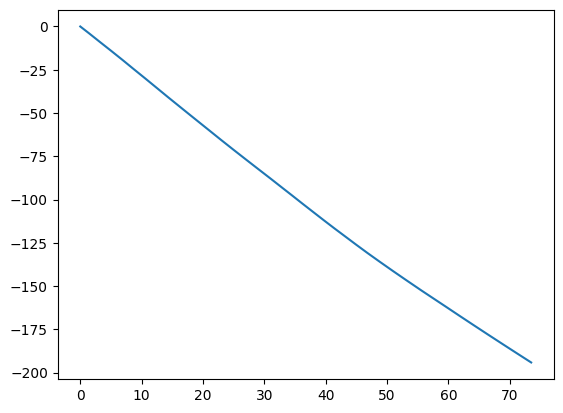

[1138.5626625508191, 1168.4387323524832, 0.0]
[1135.1533137879849, 1170.8560911133343, 0.0]
[1130.7909872509877, 1173.9968629315856, 0.0]


In [19]:
from pyquaternion import Quaternion
ego_pose = [ego_pose[i] for i in range(iter, len(ego_pose))]
ego_xyz = [pose['translation'] for pose in ego_pose]
ego_xyz = np.array(ego_xyz)
ego_xyz = ego_xyz - ego_xyz[0]
rotation = Quaternion(ego_pose[0]['rotation']).rotation_matrix
ego_xyz = np.dot(ego_xyz, rotation.T)
plot = plt.figure()
ax = plot.add_subplot(111)
ax.plot(ego_xyz[:,0], ego_xyz[:,1])
plt.show()
print(ego_pose[0]['translation'])
print(ego_pose[1]['translation'])
print(ego_pose[2]['translation'])

In [3]:

def create_line_set_bounding_box(box: BoundingBox,
                                offset:Union[float, np.ndarray],
                                axis:Union[int, np.ndarray],
                                color:Union[tuple, np.ndarray] = Colors.BLUE) -> o3d.geometry.LineSet:

    if box.corners.shape[0] != 8:
        temp_corners = box.corners.T
    else:
        temp_corners = box.corners
    o3d_box = o3d.geometry.OrientedBoundingBox.create_from_points(o3d.utility.Vector3dVector(temp_corners))

        

    o3d_box.color = color
    line_set = o3d.geometry.LineSet.create_from_oriented_bounding_box(o3d_box)
    return line_set

In [ ]:
visualizer = o3d.visualization.Visualizer()
visualizer.create_window(width=resolution[0], height=resolution[1])
lidar_data = LidarPointCloud.from_file(lidar_path)
lidar_points = lidar_data.points.T
lidar_cloud = o3d.geometry.PointCloud()
lidar_cloud.points = o3d.utility.Vector3dVector(lidar_points[:,:3])
visualizer.create_window(visible=True)
for box in gt_bbox:
        visualizer.add_geometry(create_line_set_bounding_box(box,0,0,Colors.GREEN.value))
for box in pred_bbox:
        visualizer.add_geometry(create_line_set_bounding_box(box,0,0,Colors.RED.value))
visualizer.add_geometry(lidar_cloud)
visualizer.update_geometry(lidar_cloud)
#visualizer.poll_events()
visualizer.update_renderer()

True

: 

In [ ]:
counter = 0
for result in data:
    ego_xy = result['ego_xy']
    gt_lead = result['gt_lead']
    pred_lead = result['pred_lead']
    itr = result['iter']
    if len(gt_lead) > 0 and len(pred_lead) > 0:
        plt.plot(gt_lead[0].global_center[0], gt_lead[0].global_center[1], 'g', marker='o')
        plt.plot(pred_lead[0].global_center[0], pred_lead[0].global_center[1], 'b', marker='o')
        plt.plot(ego_xy[itr,0], ego_xy[itr,1], 'k', marker='o')
        plt.plot(ego_xy[0,0], ego_xy[0,1], 'purple', marker='o')
        plt.plot(ego_xy[:, 0], ego_xy[:, 1], 'r')
        plt.title(f'GT Distance: {gt_lead[0].frenet_dist2ego:.5f} Pred Distance: {pred_lead[0].frenet_dist2ego:.5f}')
        plt.show()
        counter +=1
    if counter == 20:
        break
